# Visualize Predictions

## Parameters

In [1]:
config = '/home/Thomas/ABC_expeditions_classifier/configs/exp_resnet18.yaml'
split = 'train'

# Testing data object

In [10]:
 %run ./dataset.py

In [26]:
ABC = CTDataset(cfg= cfg, split = split)
#print(ABC.meta.head())

ABC.data

[['002908eb-4492-43d4-a554-807480f9f541_frame0_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame109_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame118_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame127_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame136_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame145_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame18_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame27_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame36_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame45_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame54_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame63_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame72_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame81_detection0', 1],
 ['002908eb-4492-43d4-a554-807480f9f541_frame90_detection0', 1],
 ['002908eb-4492-43d4

## Load Data

In [5]:
import yaml
from train import create_dataloader, load_model       # NOTE: since we're using these functions across files, it could make sense to put them in e.g. a "util.py" script.

# load config
print(f'Using config "{config}"')
cfg = yaml.safe_load(open(config, 'r'))

# setup entities
dl_test = create_dataloader(cfg, split='test')

# load model
model = load_model(cfg)

Using config "/home/Thomas/ABC_expeditions_classifier/configs/exp_resnet18.yaml"


/home/Thomas/miniconda3/envs/ABC_expeditions_classifier/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/Thomas/miniconda3/envs/ABC_expeditions_classifier/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting new model


In [10]:
len(dl_test.dataset.data)

14307

In [3]:
batch = next(iter(dl_test))


## Visualize

This is up to you to figure out now. :)

#### 1. Trying to plot an image

In [31]:
# Get the shape of the tensor
batch[0].shape

    # The shape is 
    #   128 (the number of images in the batch)
    #   3 (the RGB color channels)
    #   224 (the x coordinates)
    #   224 (the y coordinates)

# The labels of the tensor are located in the second element of the tensor

batch[1]

    # The shape is 128 (128 classes, one per image in the tensor)

# To plot the image, we need to:

    # 1. Grab the first image in tensor

img_1 = batch[0][0]

img_1.shape

    # The shape of image 1 is:

        # 3 (the RGB channels)
        # 224 (the x)
        # 224 (the y)

    # We need to change the order so the RGB channels come last in the sequence (see next code chunk)

torch.Size([3, 224, 224])

In [6]:
# In this code chunk, we will change the order of the image

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Images are traditionally plotted from numpy arrays, not tensors

    # 1. Convert the tensor to a NumPy array

numpy_array_img_1 = batch[0][0].detach().numpy()
numpy_array_img_1=np.transpose(numpy_array_img_1, (1, 2, 0))

    # The transpose step inverts the order of the numpy array, so the color channels come last'

# In the next code section, we will plot the image using PIL



In [5]:
numpy_array_img_1

array([[[0.23529412, 0.23529412, 0.23529412],
        [0.23137255, 0.23137255, 0.23137255],
        [0.22745098, 0.22745098, 0.22745098],
        ...,
        [0.34901962, 0.34901962, 0.34901962],
        [0.34117648, 0.34117648, 0.34117648],
        [0.3372549 , 0.3372549 , 0.3372549 ]],

       [[0.23529412, 0.23529412, 0.23529412],
        [0.23137255, 0.23137255, 0.23137255],
        [0.22745098, 0.22745098, 0.22745098],
        ...,
        [0.34901962, 0.34901962, 0.34901962],
        [0.34117648, 0.34117648, 0.34117648],
        [0.3372549 , 0.3372549 , 0.3372549 ]],

       [[0.23137255, 0.23137255, 0.23137255],
        [0.22745098, 0.22745098, 0.22745098],
        [0.22352941, 0.22352941, 0.22352941],
        ...,
        [0.32941177, 0.32941177, 0.32941177],
        [0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334]],

       ...,

       [[0.3529412 , 0.3529412 , 0.3529412 ],
        [0.36078432, 0.36078432, 0.36078432],
        [0.3764706 , 0

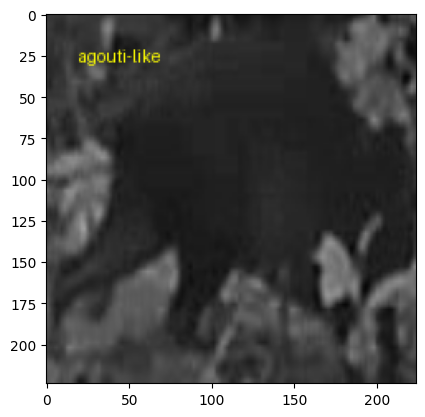

In [25]:
# To plot the image, we need to

    # Convert the image RGB values from floats to integers by
        # Multiplying by 255
        # Converting the floats to integers

image = Image.fromarray((255*numpy_array_img_1).astype(np.uint8))

draw  = ImageDraw.Draw(image)
#font  = ImageFont.truetype("arial.ttf", 20, encoding="unic")
draw.text((20,20), 
          dl_test.dataset.inv_labels.get(batch[1][0].item()), 
          fill="#FFFF00")

plt.imshow(image)

In [7]:
# Load the libraries

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Definitions

def show_batch_image(batch, index):

    # 1. Grab the image at the right index and convert to numpy array
    
    numpy_array_img = batch[0][index].detach().numpy()
    numpy_array_img=np.transpose(numpy_array_img, (1, 2, 0))

    # 2. Plot image with label 

    image = Image.fromarray((255*numpy_array_img).astype(np.uint8))
    draw  = ImageDraw.Draw(image)
    draw.text((20,20), 
          dl_test.dataset.inv_labels.get(batch[1][index].item()), 
          fill="#FFFF00")
    
    plt.imshow(image)



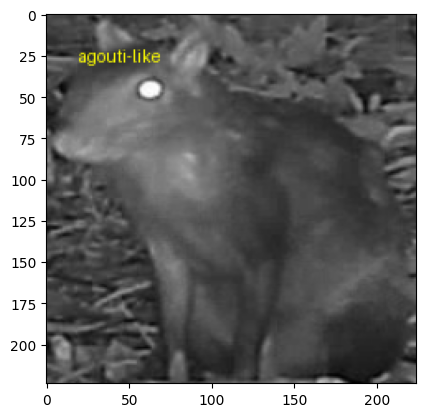

In [43]:
show_batch_image(batch=batch, index = 16)

# Feed data into model

In [52]:
model_instance, start_epoch = load_model(cfg = cfg)

start_epoch

predictions = model_instance(batch[0])


Starting new model


In [53]:
predictions.shape

torch.Size([128, 16])

{'agouti-like': 2,
 'tinamou': 3,
 'curassow': 1,
 'trumpeter': 7,
 'brocket_deer': 8,
 'coati': 10,
 'peccary': 11,
 'ocelot': 12,
 'longnosed_armadillo': 9,
 'nonground_birds': 14,
 'jaguarundi': 15,
 'paca': 4,
 'marsupial': 16,
 'empty': 0,
 'tayra': 18,
 'small_rodent': 19,
 'giant_anteater': 20,
 'nakedtailed_armadillo': 22,
 'squirrel': 17,
 'shorteared_dog': 23,
 'spixs_guan': 6,
 'puma': 24,
 'bats': 25,
 'giant_armadillo': 21,
 'crabeating_raccoon': 26,
 'southamerican_tapir': 27,
 'margay': 13}

### Checking if images are black and white or greyscale:

In [40]:
import cv2
import numpy as np

def check_bw(DataLoader):

    image_keys = list(DataLoader.dataset.images.keys())
    image_paths = [DataLoader.dataset.images[key] for key in image_keys]
    images = [cv2.imread(path) for path in image_paths]

    annotated_images = []

    for img in images:

        b, g, r = cv2.split(img)
        is_bw  = np.array_equal(b, g) and np.array_equal(g, r)
        bw_status = "BW" if is_bw else "Color"

        annotated_img = img.copy()
        cv2.putText(
            annotated_img, 
            bw_status, 
            (10, 30),  # Position: top-left corner
            cv2.FONT_HERSHEY_SIMPLEX,  # Font type
            1,  # Font scale
            (0, 255, 255),  # Yellow color (BGR format)
            2,  # Thickness
            cv2.LINE_AA  # Anti-aliased line
        )

        annotated_images.append(annotated_img)

    return annotated_images




In [41]:
# Check the black and white status

images = check_bw(DataLoader=dl_test)

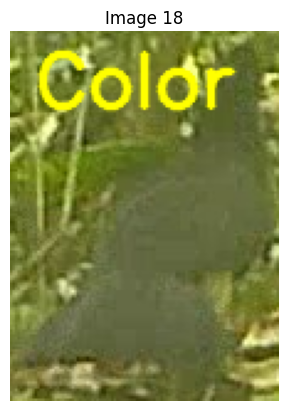

In [70]:
import matplotlib.pyplot as plt

index = 18

plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title(f"Image {index}")
plt.axis('off')
plt.show()